In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
learning_rate=0.01
epochs=200

In [3]:
n_samples=30
train_x=np.linspace(0,20,n_samples)
train_y=3*train_x+4*np.random.randn(n_samples)

In [10]:
train_x

array([ 0.        ,  0.68965517,  1.37931034,  2.06896552,  2.75862069,
        3.44827586,  4.13793103,  4.82758621,  5.51724138,  6.20689655,
        6.89655172,  7.5862069 ,  8.27586207,  8.96551724,  9.65517241,
       10.34482759, 11.03448276, 11.72413793, 12.4137931 , 13.10344828,
       13.79310345, 14.48275862, 15.17241379, 15.86206897, 16.55172414,
       17.24137931, 17.93103448, 18.62068966, 19.31034483, 20.        ])

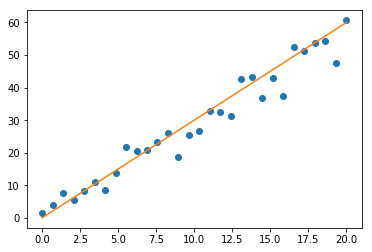

In [13]:
plt.plot(train_x,train_y,'o')
plt.plot(train_x,3*train_x)
plt.show()

In [14]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

W=tf.Variable(np.random.randn(),name='weights')
B=tf.Variable(np.random.randn(),name='bias') 

In [15]:
pred=tf.add(tf.multiply(X,W),B)

cost=tf.reduce_sum(((pred-Y)**2)/(2*n_samples))

optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
init=tf.global_variables_initializer()

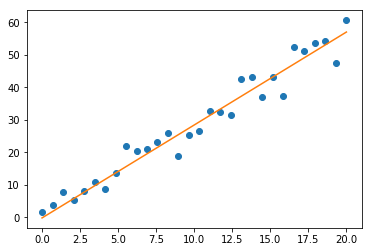

In [17]:
with tf.Session() as s:
    s.run(init)
    for epoch in range(epochs):
        for x,y in zip(train_x,train_y):
            s.run(optimizer,feed_dict={X:x,Y:y})
        if not epoch%20:
            c=s.run(cost,feed_dict={X:train_x,Y:train_y})
            w=s.run(W)
            b=s.run(B)
    weight=s.run(W)
    bias=s.run(B)
    plt.plot(train_x,train_y,'o')
    plt.plot(train_x,weight*train_x+bias)
    plt.show()